In [1]:
from google.colab import files
uploaded = files.upload()


Saving Alcoholism_eeg_dataset .csv to Alcoholism_eeg_dataset .csv


Epoch 1/100
41/41 [==============================] - 19s 110ms/step - loss: 0.6629 - accuracy: 0.5702 - val_loss: 0.4084 - val_accuracy: 0.8110
Epoch 2/100
41/41 [==============================] - 3s 63ms/step - loss: 0.3173 - accuracy: 0.8534 - val_loss: 0.1699 - val_accuracy: 0.9268
Epoch 3/100
41/41 [==============================] - 3s 62ms/step - loss: 0.1565 - accuracy: 0.9427 - val_loss: 0.1140 - val_accuracy: 0.9512
Epoch 4/100
41/41 [==============================] - 3s 84ms/step - loss: 0.1345 - accuracy: 0.9435 - val_loss: 0.1636 - val_accuracy: 0.9360
Epoch 5/100
41/41 [==============================] - 3s 83ms/step - loss: 0.1307 - accuracy: 0.9504 - val_loss: 0.1073 - val_accuracy: 0.9573
Epoch 6/100
41/41 [==============================] - 3s 61ms/step - loss: 0.0885 - accuracy: 0.9695 - val_loss: 0.0540 - val_accuracy: 0.9756
Epoch 7/100
41/41 [==============================] - 3s 62ms/step - loss: 0.0703 - accuracy: 0.9710 - val_loss: 0.0499 - val_accuracy: 0.9695
Epoc

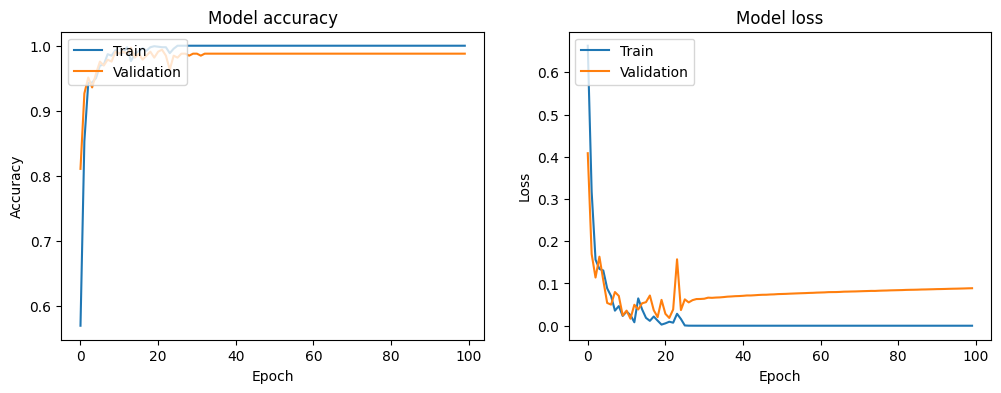

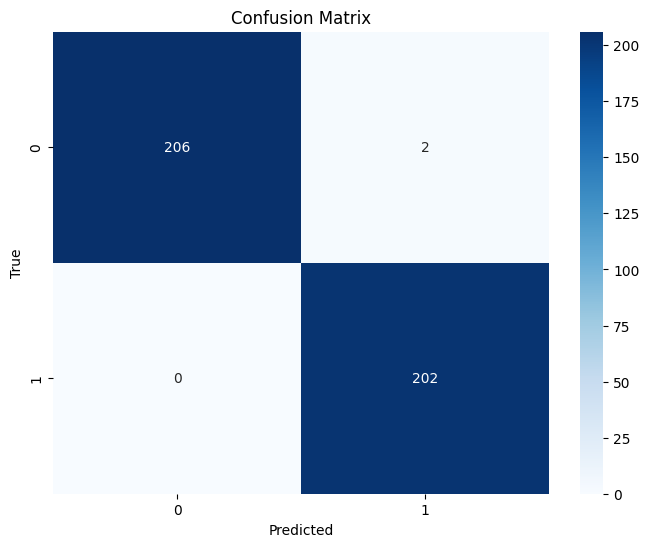

In [22]:
#  Final Code for alcoholism paper  # use this code
# Designing of the attention-based model
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, Bidirectional, LSTM, Dense, Attention, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.decomposition import PCA, FastICA

# Load the data
data = pd.read_csv('Alcoholism_eeg_dataset .csv')

# Separate features and labels
X = data.drop(columns=['Class']).values
y = data['Class'].values

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)





import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import Input, Conv1D, Bidirectional, LSTM, Attention, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

# Apply PCA
pca = PCA(n_components=25)
X_pca = pca.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_categorical, test_size=0.2, random_state=42)

# Define CNN-BiLSTM with attention model
input_layer = Input(shape=(X_train.shape[1], 1))
conv_layer1 = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
conv_layer2 = Conv1D(filters=64, kernel_size=3, activation='relu')(conv_layer1)
conv_layer3 = Conv1D(filters=64, kernel_size=3, activation='relu')(conv_layer2)
bi_lstm_layer1 = Bidirectional(LSTM(64, return_sequences=True))(conv_layer3)
bi_lstm_layer2 = Bidirectional(LSTM(64, return_sequences=True))(bi_lstm_layer1)
attention_layer = Attention()([bi_lstm_layer2, bi_lstm_layer2])
flatten_layer = Flatten()(attention_layer)
output_layer = Dense(y_train.shape[1], activation='softmax')(flatten_layer)

model = Sequential(name='Alco-net')
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape data for Conv1D
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Train the model and store the history
history = model.fit(X_train_cnn, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred = model.predict(X_test_cnn)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
class_report = classification_report(y_true_classes, y_pred_classes)
print("Accuracy Score",accuracy_score(y_pred_classes,y_true_classes))
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [15]:
# use this model (NEW)

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import Input, Conv1D, Bidirectional, LSTM, Attention, Flatten, Dense
from tensorflow.keras.models import Model
import numpy as np

# Apply PCA
pca = PCA(n_components=25)
X_pca = pca.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_categorical, test_size=0.2, random_state=42)

# Define CNN-BiLSTM with attention model
input_layer = Input(shape=(X_train.shape[1], 1))
conv_layer1 = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
conv_layer2 = Conv1D(filters=64, kernel_size=3, activation='relu')(conv_layer1)
conv_layer3 = Conv1D(filters=64, kernel_size=3, activation='relu')(conv_layer2)
bi_lstm_layer1 = Bidirectional(LSTM(64, return_sequences=True))(conv_layer3)
bi_lstm_layer2 = Bidirectional(LSTM(64, return_sequences=True))(bi_lstm_layer1)
attention_layer = Attention()([bi_lstm_layer2, bi_lstm_layer2])
flatten_layer = Flatten()(attention_layer)
output_layer = Dense(y_train.shape[1], activation='softmax')(flatten_layer)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Reshape data for Conv1D
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Train the model
model.fit(X_train_cnn, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred = model.predict(X_test_cnn)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
class_report = classification_report(y_true_classes, y_pred_classes)

print("Accuracy score",accuracy_score(y_true_classes, y_pred_classes))
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Epoch 1/100
41/41 [==============================] - 14s 107ms/step - loss: 0.6012 - accuracy: 0.6458 - val_loss: 0.5817 - val_accuracy: 0.6646
Epoch 2/100
41/41 [==============================] - 3s 63ms/step - loss: 0.3496 - accuracy: 0.8695 - val_loss: 0.2301 - val_accuracy: 0.9116
Epoch 3/100
41/41 [==============================] - 3s 64ms/step - loss: 0.1977 - accuracy: 0.9183 - val_loss: 0.1816 - val_accuracy: 0.9177
Epoch 4/100
41/41 [==============================] - 4s 99ms/step - loss: 0.1562 - accuracy: 0.9374 - val_loss: 0.1384 - val_accuracy: 0.9390
Epoch 5/100
41/41 [==============================] - 2s 59ms/step - loss: 0.1264 - accuracy: 0.9443 - val_loss: 0.1560 - val_accuracy: 0.9299
Epoch 6/100
41/41 [==============================] - 3s 63ms/step - loss: 0.1207 - accuracy: 0.9542 - val_loss: 0.1111 - val_accuracy: 0.9451
Epoch 7/100
41/41 [==============================] - 3s 64ms/step - loss: 0.0873 - accuracy: 0.9702 - val_loss: 0.0939 - val_accuracy: 0.9634
Epoc

In [24]:

model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 25, 1)]              0         []                            
                                                                                                  
 conv1d_20 (Conv1D)          (None, 23, 64)               256       ['input_8[0][0]']             
                                                                                                  
 conv1d_21 (Conv1D)          (None, 21, 64)               12352     ['conv1d_20[0][0]']           
                                                                                                  
 conv1d_22 (Conv1D)          (None, 19, 64)               12352     ['conv1d_21[0][0]']           
                                                                                            

In [7]:
# performance comparison with other classifiers


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Flatten, Bidirectional
from tensorflow.keras.utils import to_categorical

# Load the data
data = pd.read_csv('Alcoholism_eeg_dataset .csv')

# Separate features and labels
X = data.drop(columns=['Class']).values
y = data['Class'].values

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# SVM model
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("SVM Classification Report:")
print(classification_report(y_test, svm_pred))

# KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print("KNN Classification Report:")
print(classification_report(y_test, knn_pred))

# Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_pred))

# Prepare data for neural networks
X_train_nn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_nn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
y_train_nn = to_categorical(y_train)
y_test_nn = to_categorical(y_test)

# LSTM model
lstm_model = Sequential([
    LSTM(64, input_shape=(X_train_nn.shape[1], 1)),
    Dense(y_train_nn.shape[1], activation='softmax')
])
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_nn, y_train_nn, epochs=10, batch_size=32, verbose=0)
lstm_pred = np.argmax(lstm_model.predict(X_test_nn), axis=1)
print("LSTM Accuracy:", accuracy_score(y_test, lstm_pred))
print("LSTM Classification Report:")
print(classification_report(y_test, lstm_pred))

# 1D CNN model
cnn_model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_nn.shape[1], 1)),
    Flatten(),
    Dense(y_train_nn.shape[1], activation='softmax')
])
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_nn, y_train_nn, epochs=10, batch_size=32, verbose=0)
cnn_pred = np.argmax(cnn_model.predict(X_test_nn), axis=1)
print("1D CNN Accuracy:", accuracy_score(y_test, cnn_pred))
print("1D CNN Classification Report:")
print(classification_report(y_test, cnn_pred))

# BiLSTM model
bilstm_model = Sequential([
    Bidirectional(LSTM(64), input_shape=(X_train_nn.shape[1], 1)),
    Dense(y_train_nn.shape[1], activation='softmax')
])
bilstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
bilstm_model.fit(X_train_nn, y_train_nn, epochs=10, batch_size=32, verbose=0)
bilstm_pred = np.argmax(bilstm_model.predict(X_test_nn), axis=1)
print("BiLSTM Accuracy:", accuracy_score(y_test, bilstm_pred))
print("BiLSTM Classification Report:")
print(classification_report(y_test, bilstm_pred))


SVM Accuracy: 0.9975609756097561
SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       208
           1       1.00      1.00      1.00       202

    accuracy                           1.00       410
   macro avg       1.00      1.00      1.00       410
weighted avg       1.00      1.00      1.00       410

KNN Accuracy: 0.9926829268292683
KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       208
           1       0.99      1.00      0.99       202

    accuracy                           0.99       410
   macro avg       0.99      0.99      0.99       410
weighted avg       0.99      0.99      0.99       410

Naive Bayes Accuracy: 0.8536585365853658
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       208
           1       0.87      0.83      0.

In [23]:
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 25, 1)]              0         []                            
                                                                                                  
 conv1d_20 (Conv1D)          (None, 23, 64)               256       ['input_8[0][0]']             
                                                                                                  
 conv1d_21 (Conv1D)          (None, 21, 64)               12352     ['conv1d_20[0][0]']           
                                                                                                  
 conv1d_22 (Conv1D)          (None, 19, 64)               12352     ['conv1d_21[0][0]']           
                                                                                            

In [27]:

# With PCA and without PCA comparison

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, Bidirectional, LSTM, Dense, Attention, Flatten
from tensorflow.keras.utils import to_categorical

# Load the data
data = pd.read_csv('Alcoholism_eeg_dataset .csv')

# Separate features and labels
X = data.drop(columns=['Class']).values
y = data['Class'].values

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to build the model
def build_model(input_shape, num_classes):
    input_layer = Input(shape=(input_shape, 1))
    conv_layer = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
    bi_lstm_layer = Bidirectional(LSTM(64, return_sequences=True))(conv_layer)
    attention_layer = Attention()([bi_lstm_layer, bi_lstm_layer])
    flatten_layer = Flatten()(attention_layer)
    output_layer = Dense(num_classes, activation='softmax')(flatten_layer)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Assess performance with PCA
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y_categorical, test_size=0.2, random_state=42)
X_train_pca_cnn = X_train_pca.reshape(X_train_pca.shape[0], X_train_pca.shape[1], 1)
X_test_pca_cnn = X_test_pca.reshape(X_test_pca.shape[0], X_test_pca.shape[1], 1)

model_pca = build_model(X_train_pca.shape[1], y_train.shape[1])
model_pca.fit(X_train_pca_cnn, y_train, epochs=100, batch_size=32, validation_split=0.2)

y_pred_pca = model_pca.predict(X_test_pca_cnn)
y_pred_classes_pca = np.argmax(y_pred_pca, axis=1)
y_true_classes_pca = np.argmax(y_test, axis=1)

print("With PCA:")
print("Accuracy score",accuracy_score(y_true_classes, y_pred_classes))
print("Confusion Matrix:")
print(confusion_matrix(y_true_classes_pca, y_pred_classes_pca))
print("\nClassification Report:")
print(classification_report(y_true_classes_pca, y_pred_classes_pca))

# Assess performance without PCA
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model_no_pca = build_model(X_train.shape[1], y_train.shape[1])
model_no_pca.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_split=0.2)

y_pred_no_pca = model_no_pca.predict(X_test_cnn)
y_pred_classes_no_pca = np.argmax(y_pred_no_pca, axis=1)
y_true_classes_no_pca = np.argmax(y_test, axis=1)

print("\nWithout PCA:")
print("Accuracy score",accuracy_score(y_true_classes, y_pred_classes))
print("Confusion Matrix:")
print(confusion_matrix(y_true_classes_no_pca, y_pred_classes_no_pca))
print("\nClassification Report:")
print(classification_report(y_true_classes_no_pca, y_pred_classes_no_pca))


Epoch 1/100
41/41 [==============================] - 8s 55ms/step - loss: 0.5884 - accuracy: 0.6802 - val_loss: 0.4401 - val_accuracy: 0.8140
Epoch 2/100
41/41 [==============================] - 1s 28ms/step - loss: 0.4383 - accuracy: 0.8038 - val_loss: 0.4169 - val_accuracy: 0.8049
Epoch 3/100
41/41 [==============================] - 1s 27ms/step - loss: 0.3625 - accuracy: 0.8435 - val_loss: 0.3033 - val_accuracy: 0.8720
Epoch 4/100
41/41 [==============================] - 1s 27ms/step - loss: 0.3049 - accuracy: 0.8641 - val_loss: 0.2745 - val_accuracy: 0.8872
Epoch 5/100
41/41 [==============================] - 1s 27ms/step - loss: 0.2807 - accuracy: 0.8794 - val_loss: 0.2522 - val_accuracy: 0.8872
Epoch 6/100
41/41 [==============================] - 1s 27ms/step - loss: 0.2672 - accuracy: 0.8901 - val_loss: 0.2241 - val_accuracy: 0.9207
Epoch 7/100
41/41 [==============================] - 1s 27ms/step - loss: 0.2500 - accuracy: 0.8885 - val_loss: 0.2551 - val_accuracy: 0.8933
Epoch 